In [6]:
pip install tensorflowjs

Note: you may need to restart the kernel to use updated packages.


In [7]:
#Importing Libraries
import os
import numpy as np
#import tensorflowjs
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from gettext import install

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# data_dir='/content/drive/MyDrive/butterflyml/Butterfly/butterfly_photos/'
# print(data_dir)
data_dir='C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/'
print(data_dir)

C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/


In [10]:
data_dir=tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 1050 files belonging to 4 classes.


In [11]:
count = 0
dirs = os.listdir('C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/')
for dir in dirs:
    files = list(os.listdir('C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/'+dir))
    print( dir +' Folder has '+ str(len(files)) + 'C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + 'C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/')

Anaphylaxis Infection Folder has 88C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/
Gnathostomiasis Folder has 226C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/
Healthy Larvae Folder has 622C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/
Nucleopolyhedrosis Folder has 114C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/
Images Folder has 1050C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/


In [12]:
base_dir = 'C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/'
img_size = 180
batch = 32

In [13]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 1050 files belonging to 4 classes.
Using 840 files for training.
Found 1050 files belonging to 4 classes.
Using 210 files for validation.


In [ ]:
larvaldiseases_names = train_ds.class_names
larvaldiseases_names 

['Anaphylaxis Infection',
 'Gnathostomiasis',
 'Healthy Larvae',
 'Nucleopolyhedrosis']

In [15]:
import matplotlib.pyplot as plt

In [16]:
print(len(train_ds))
for element in train_ds.take(1):
    print(element)


27
(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
array([[[[1.85569992e+02, 1.80569992e+02, 1.76569992e+02],
         [1.83843338e+02, 1.78843338e+02, 1.74843338e+02],
         [1.83199997e+02, 1.78199997e+02, 1.74199997e+02],
         ...,
         [2.39933456e+02, 2.44933456e+02, 2.48933456e+02],
         [2.38200195e+02, 2.43200195e+02, 2.47200195e+02],
         [2.42096786e+02, 2.47096786e+02, 2.51096786e+02]],

        [[1.82490005e+02, 1.77490005e+02, 1.73490005e+02],
         [1.83540009e+02, 1.78540009e+02, 1.74540009e+02],
         [1.86750000e+02, 1.81750000e+02, 1.77750000e+02],
         ...,
         [2.41000168e+02, 2.46000168e+02, 2.50000168e+02],
         [2.40000000e+02, 2.45000000e+02, 2.49000000e+02],
         [2.40160065e+02, 2.45160065e+02, 2.49160065e+02]],

        [[1.81166672e+02, 1.76166672e+02, 1.72166672e+02],
         [1.84766663e+02, 1.76766663e+02, 1.73766663e+02],
         [1.86333344e+02, 1.78333344e+02, 1.75333344e+02],
         ...,
      

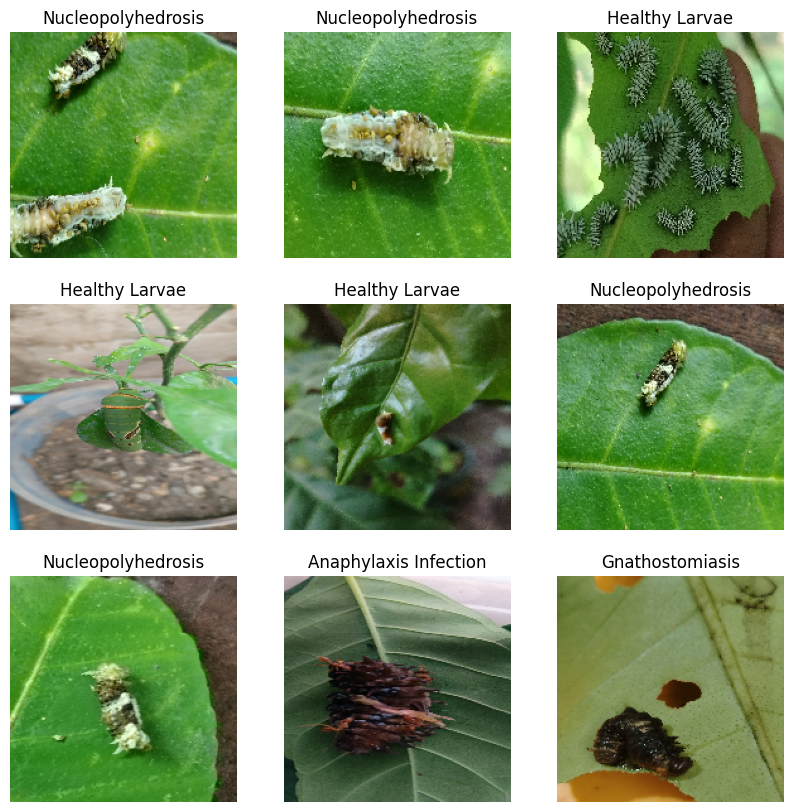

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(larvaldiseases_names [labels[i]])
        plt.axis('off')

In [18]:
AUTOTUNE = tf.data.AUTOTUNE

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [20]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

##Data AUgmentation

In [21]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

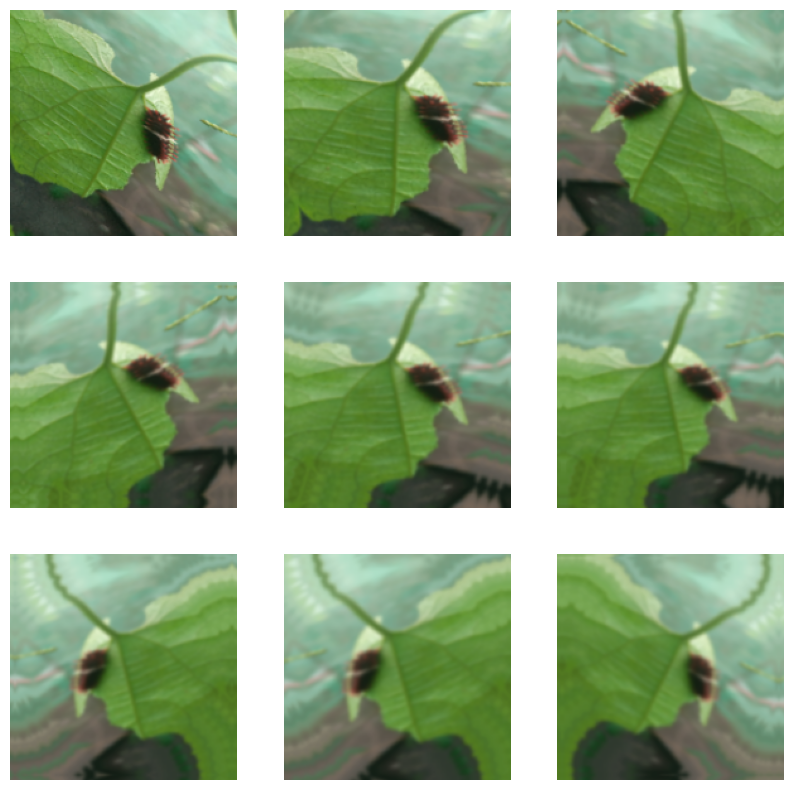

In [22]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

##Model Creation

In [23]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [26]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15


27/27 [==============================] - 11s 369ms/step - loss: 0.9099 - accuracy: 0.6500 - val_loss: 0.5710 - val_accuracy: 0.8238
Epoch 2/15
27/27 [==============================] - 5s 180ms/step - loss: 0.5384 - accuracy: 0.8155 - val_loss: 0.4089 - val_accuracy: 0.8524
Epoch 3/15
27/27 [==============================] - 5s 187ms/step - loss: 0.4050 - accuracy: 0.8607 - val_loss: 0.3935 - val_accuracy: 0.8810
Epoch 4/15
27/27 [==============================] - 5s 192ms/step - loss: 0.3025 - accuracy: 0.8952 - val_loss: 0.2616 - val_accuracy: 0.9333
Epoch 5/15
27/27 [==============================] - 5s 185ms/step - loss: 0.2410 - accuracy: 0.9190 - val_loss: 0.2379 - val_accuracy: 0.9286
Epoch 6/15
27/27 [==============================] - 5s 175ms/step - loss: 0.2357 - accuracy: 0.9202 - val_loss: 0.4205 - val_accuracy: 0.8762
Epoch 7/15
27/27 [==============================] - 5s 186ms/step - loss: 0.1963 - accuracy: 0.9274 - val_loss: 0.1549 - val_accuracy: 0.9571
Epo

In [ ]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + larvaldiseases_names [np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [28]:
classify_images('C:/Users/jerwin/Documents/GitHub/butterfly_photos/larval diseases/Healthy Larvae/IMG_20240102_132140_566.jpg')

1/1 [==============================] - 0s 124ms/step


'The Image belongs to Healthy Larvae with a score of 99.27430152893066'

In [ ]:
model.save('C:/Users/jerwin/Documents/GitHub/PrettyLep/model/model_Laval_Diseases.keras')

In [ ]:
model.save('C:/Users/jerwin/Documents/GitHub/PrettyLep/model/model_Larval_Diseases.h5')

c:\Users\jerwin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = load_model('C:/Users/jerwin/Documents/GitHub/PrettyLep/model/model_Larval_Diseases.h5')


In [32]:
# Check the loaded model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("C:/Users/jerwin/Documents/GitHub/PrettyLep/json/model_Larval_Disease.json", "w") as json_file:
    json_file.write(model_json)


In [34]:
from tensorflow.keras.models import load_model


In [ ]:
model = load_model('C:/Users/jerwin/Documents/GitHub/PrettyLep/model/model_Larval_Diseases.h5')

In [ ]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("C:/Users/jerwin/Documents/GitHub/PrettyLep/json/Architecture_larval_disease.json", "w") as json_file:
    json_file.write(model_json)


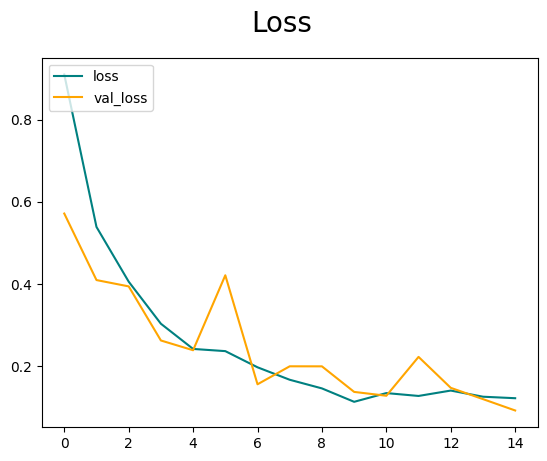

In [37]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

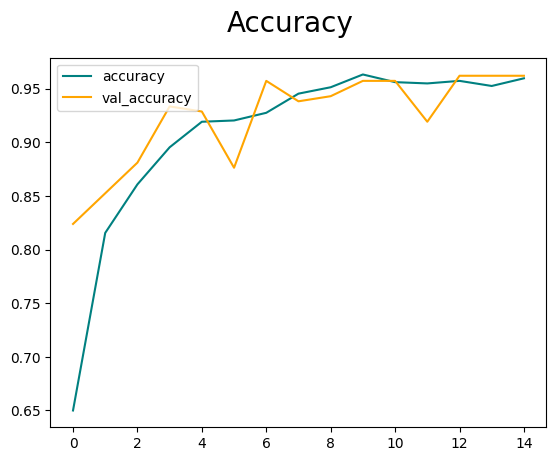

In [38]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

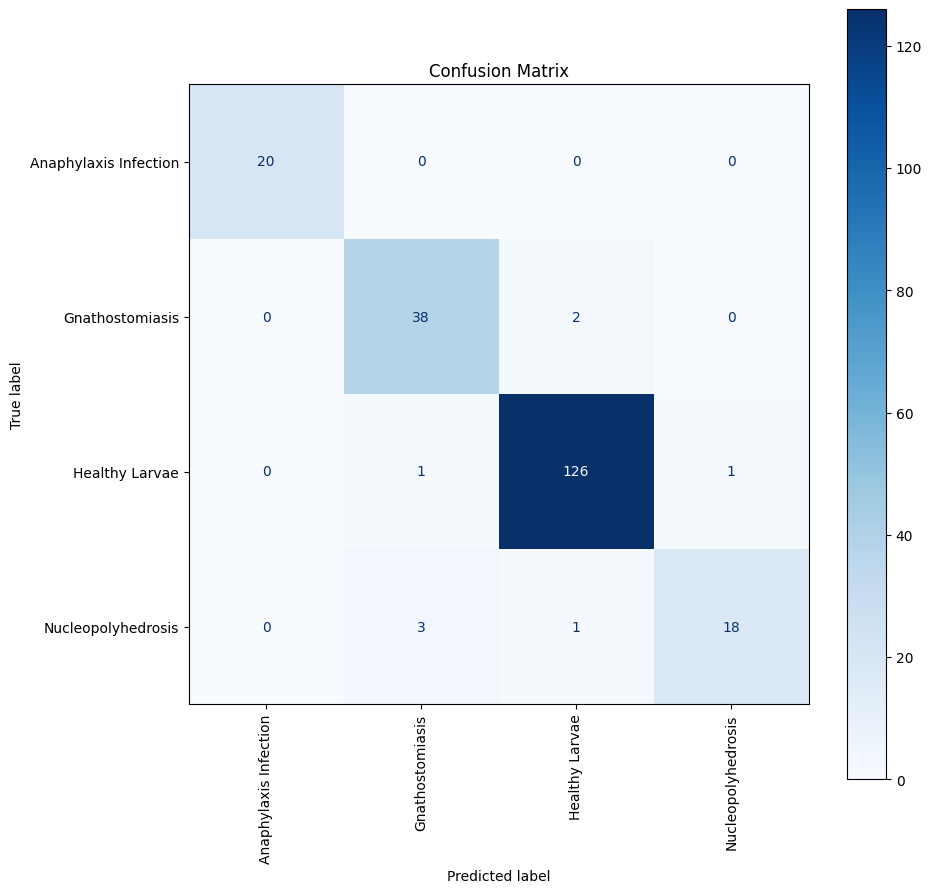

F1 Score (macro): 0.9464
F1 Score (weighted): 0.9614


In [ ]:

# ...existing code...

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Evaluate model and plot confusion matrix + F1 score
y_true = []
y_pred = []

for images, labels in val_ds.unbatch():
    img_array = tf.expand_dims(images, 0)  # Add batch dimension
    preds = model.predict(img_array, verbose=0)
    pred_label = np.argmax(preds, axis=1)[0]
    y_true.append(labels.numpy())
    y_pred.append(pred_label)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=larvaldiseases_names )
disp.plot(ax=ax, cmap='Blues', xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()

# F1 Score (macro and weighted)
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score (macro): {f1_macro:.4f}")
print(f"F1 Score (weighted): {f1_weighted:.4f}")
# ...existing code...